## Main modules

In [263]:
import pandas as pd
import numpy as np

## Plotting modules

In [264]:
import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

## Models modules

In [265]:
from sklearn.svm import SVC
from sklearn import preprocessing, linear_model, naive_bayes, metrics, svm

import xgboost as xgb
import catboost as cgb
import lightgbm as lgb

## Random variable modules

In [266]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

## Model helper modules

In [267]:
import importlib
from pathlib import Path

from sklearn.model_selection import KFold,cross_val_score,train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn import decomposition, ensemble

In [268]:
ecdc = pd.read_csv("current-data-on-the-geographic-distribution-of-covid-19-cases-worldwide.csv")

In [269]:
ecdc.head()

,daterep,day,month,year,cases,deaths,countriesandterritories,geoid,countryterritorycode,popdata2018,continentexp
0,NaN,28,4,2020,172,0,Afghanistan,AF,AFG,37172386.0,Asia
1,NaN,27,4,2020,68,10,Afghanistan,AF,AFG,37172386.0,Asia
2,NaN,26,4,2020,112,4,Afghanistan,AF,AFG,37172386.0,Asia
3,NaN,25,4,2020,70,1,Afghanistan,AF,AFG,37172386.0,Asia
4,NaN,24,4,2020,105,2,Afghanistan,AF,AFG,37172386.0,Asia


## Using plotly

In [40]:
fig = go.Figure(
    data=[go.Bar(x =ecdc.groupby("geoid").agg({"cases":"sum"}).index ,y=ecdc.groupby("geoid").agg({"cases":"sum"})["cases"])],
    layout_title_text="Number of cases by GeoId"
)
fig.show()

In [37]:
ecdc.groupby("geoid").agg({"cases":"sum"}).index

Index(['AD', 'AE', 'AF', 'AG', 'AI', 'AL', 'AM', 'AO', 'AR', 'AT',
       ...
       'VC', 'VE', 'VG', 'VI', 'VN', 'XK', 'YE', 'ZA', 'ZM', 'ZW'],
      dtype='object', name='geoid', length=206)

## Using matplotlib.pyplot

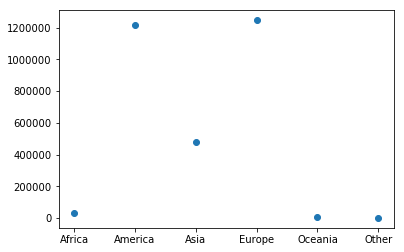

In [46]:
plt.scatter(ecdc.groupby("continentexp").agg({"cases":"sum"}).index, ecdc.groupby("continentexp").agg({"cases":"sum"})["cases"])
plt.show()

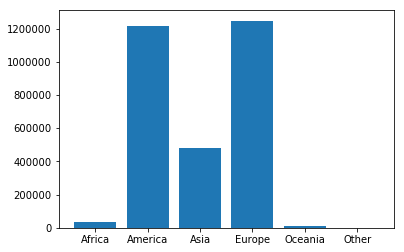

In [48]:
plt.bar(ecdc.groupby("continentexp").agg({"cases":"sum"}).index, ecdc.groupby("continentexp").agg({"cases":"sum"})["cases"])
plt.show()

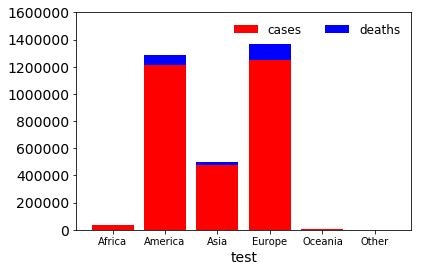

In [60]:
p1 = plt.bar(ecdc.groupby("continentexp").agg({"cases":"sum"}).index, ecdc.groupby("continentexp").agg({"cases":"sum"})["cases"], color='r')
p2 = plt.bar(ecdc.groupby("continentexp").agg({"deaths":"sum"}).index, ecdc.groupby("continentexp").agg({"deaths":"sum"})["deaths"], bottom=ecdc.groupby("continentexp").agg({"cases":"sum"})["cases"], color='b')

plt.ylim([0,1600000])
plt.yticks(fontsize=14)
plt.xlabel('test', fontsize=14)
plt.legend((p1[0], p2[0]), ("cases", "deaths"), fontsize=12, ncol=2, framealpha=0, fancybox=True)
plt.show()

## Using sns for plotting

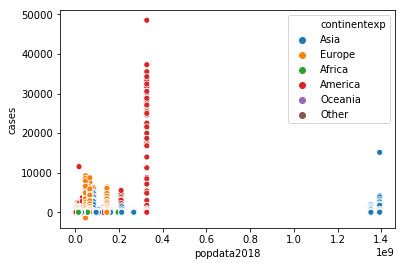

In [65]:
sns.scatterplot(x="popdata2018", y="cases", hue="continentexp", data=ecdc);

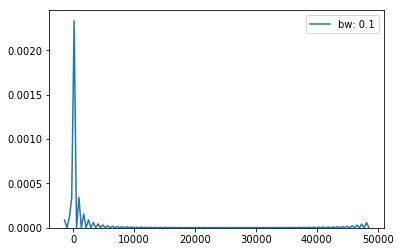

In [89]:
sns.kdeplot(ecdc["cases"], label="bw: 0.1");

In [174]:
def data_explore(data):
    num_list = data.select_dtypes(include=np.number).columns.tolist()
    cat_list = data.select_dtypes(include=np.object).columns.tolist()
    
    for var in num_list:
        if(sum(1*(data[var].isnull())) != len(data)):
            plt.figure(var)
            print(data[var].describe())
            sns.kdeplot(data[var]);
        
    for var in cat_list:
        if(sum(1*(data[var].isnull())) != len(data)):
            plt.figure(var)
            print(data[var].value_counts())
            sns.countplot(data[var]);

count    13623.000000
mean        16.433972
std          8.600193
min          1.000000
25%          9.000000
50%         17.000000
75%         24.000000
max         31.000000
Name: day, dtype: float64
count    13623.000000
mean         3.016002
std          1.252996
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         12.000000
Name: month, dtype: float64
count    13623.000000
mean      2019.995082
std          0.069959
min       2019.000000
25%       2020.000000
50%       2020.000000
75%       2020.000000
max       2020.000000
Name: year, dtype: float64
count    13623.000000
mean       218.945019
std       1554.359440
min      -1430.000000
25%          0.000000
50%          1.000000
75%         27.000000
max      48529.000000
Name: cases, dtype: float64
count    13623.000000
mean        15.429274
std        119.405913
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4928.000000
Name: death

C:\Users\GadikatlaV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning:

invalid value encountered in greater

C:\Users\GadikatlaV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning:

invalid value encountered in less



FR    120
SE    120
CN    120
DE    120
BR    120
BE    120
IS    120
AU    120
CH    120
US    120
IR    120
SG    120
NL    120
UK    120
CA    120
AT    120
JP    120
RU    120
IT    120
KR    120
NO    120
DK    120
CZ    120
IN    119
MY    119
ES    119
SM    119
BH    119
RO    118
IE    118
     ... 
DM     37
SY     37
AW     37
GD     37
MZ     37
VC     36
BZ     36
CW     36
TC     35
VI     35
LY     35
LA     35
ML     34
SX     34
KN     34
GW     33
AI     33
VG     33
PR     32
MP     29
BI     28
SL     28
BW     28
BQ     27
MW     26
FK     25
SS     23
ST     20
YE     19
EH      3
Name: geoid, Length: 206, dtype: int64
JPN    120
ISL    120
AUS    120
DEU    120
CHN    120
SGP    120
FRA    120
SWE    120
CHE    120
BEL    120
GBR    120
ITA    120
CZE    120
RUS    120
BRA    120
USA    120
NOR    120
CAN    120
NLD    120
AUT    120
KOR    120
DNK    120
IRN    120
BHR    119
ESP    119
IND    119
MYS    119
SMR    119
IRL    118
GRC    118
      ... 
ERI     38

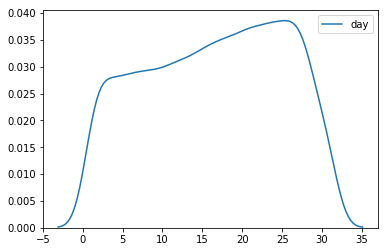

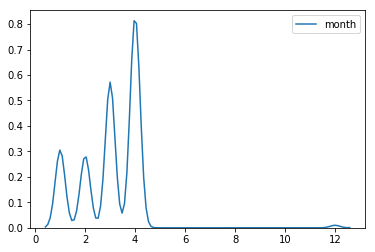

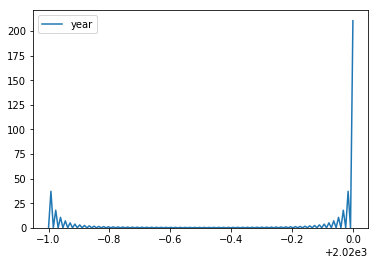

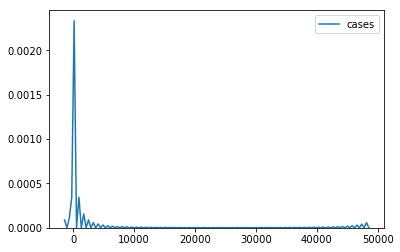

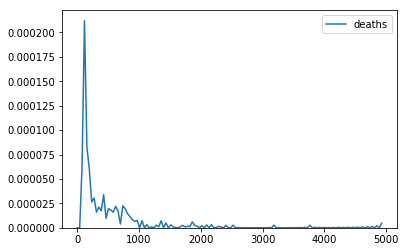

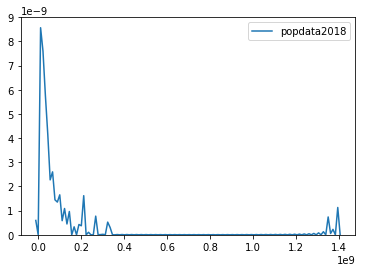

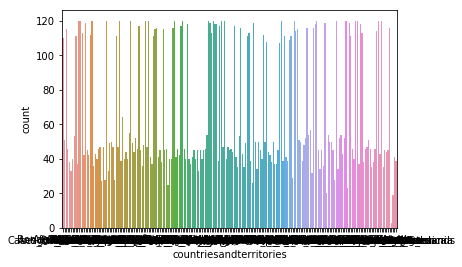

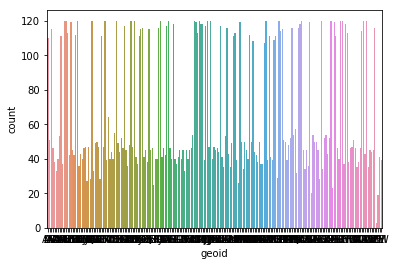

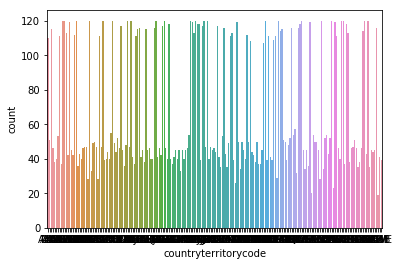

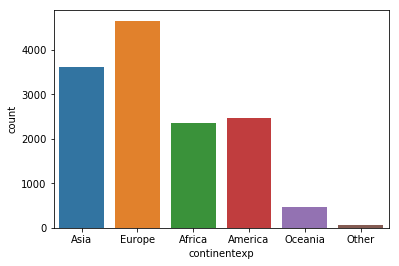

In [175]:
data_explore(ecdc)

## Data engineering

In [270]:
ecdc_y = ecdc["cases"].values

In [271]:
cat_list = ecdc.select_dtypes(include=np.object).columns.tolist()

In [272]:
ecdc_dummies = pd.get_dummies(ecdc[['geoid', 'countryterritorycode', 'continentexp']])

In [273]:
ecdc.drop(cat_list, axis = 1, inplace = True)

In [274]:
ecdc = pd.concat([ecdc,ecdc_dummies], axis = 1)

In [275]:
ecdc.shape

(13623, 421)

In [276]:
ecdc_x = ecdc.drop(["cases","deaths"],axis = 1)

In [285]:
req_list = ecdc_x.columns

In [286]:
target = "cases"

In [277]:
ecdc_y

array([172,  68, 112, ...,   0,   1,   1], dtype=int64)

In [278]:
cat_list

['countriesandterritories', 'geoid', 'countryterritorycode', 'continentexp']

In [279]:
## remove countriesandterritories in dummy list

## LGB model

In [280]:
lgbh = lgb.LGBMRegressor(n_estimators = 100, metric = 'rmse')

In [281]:
lgbh.fit(ecdc_x,ecdc_y)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       metric='rmse', min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
       objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
       silent=True, subsample=1.0, subsample_for_bin=200000,
       subsample_freq=0)

In [282]:
y_pred = lgbh.predict(ecdc_x)

In [283]:
np.corrcoef(y_pred, ecdc_y)

array([[ 1.        ,  0.96389435],
       [ 0.96389435,  1.        ]])

In [320]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        lgb_param = alg.get_params()
        lgtrain = lgb.Dataset(ecdc,label=ecdc_y)
        cvresult = lgb.cv(lgb_param, lgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmse', early_stopping_rounds=early_stopping_rounds)
        print(pd.DataFrame(cvresult))
        alg.set_params(n_estimators=pd.DataFrame(cvresult).shape[0])
    

    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='rmse')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
        
    #Print model report:
    print('\nModel Report')
    print("R2 (Train):",metrics.r2_score(dtrain[target], dtrain_predictions))
                    
    feat_imp = pd.DataFrame(sorted(zip(alg.feature_importances_,ecdc_x.columns)),columns = ["Value","Feature"])
    print(feat_imp)
    
    plt.figure(figsize = (20,10))
    sns.barplot(x= "Value", y="Feature", data = feat_imp.sort_values(by = "Value", ascending = False) )
    plt.title('LightGBM Features (average over folds)')
    plt.tight_layout()
    plt.show()

C:\Users\GadikatlaV\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

C:\Users\GadikatlaV\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:842: UserWarning:

silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.

C:\Users\GadikatlaV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning:

The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.



     rmse-mean    rmse-stdv
0   801.061182  1123.370576
1   773.421361  1116.005533
2   748.799446  1109.784623
3   726.816088  1104.545391
4   707.159914  1100.158242
5   689.589534  1096.455593
6   673.996359  1093.573404
7   659.997855  1090.982986
8   647.842657  1089.583607
9   636.416776  1087.341705
10  626.641554  1086.386646
11  617.348441  1084.532883
12  609.054703  1082.927225
13  601.865010  1082.084051
14  595.153788  1080.808210
15  589.308226  1080.095169
16  583.783953  1078.919583
17  579.273777  1078.174732
18  574.820780  1077.114257
19  571.684613  1076.239769
20  568.082557  1075.278933
21  565.061120  1074.756566
22  562.194383  1073.904960
23  559.743939  1073.402440
24  558.258411  1072.514022
25  556.288394  1072.017094
26  554.490029  1071.500318
27  552.890630  1071.020668
28  551.496197  1070.481316
29  550.194299  1070.021371
..         ...          ...
64  539.522659  1060.186381
65  539.941090  1060.864860
66  539.741720  1060.561745
67  539.637702  1060

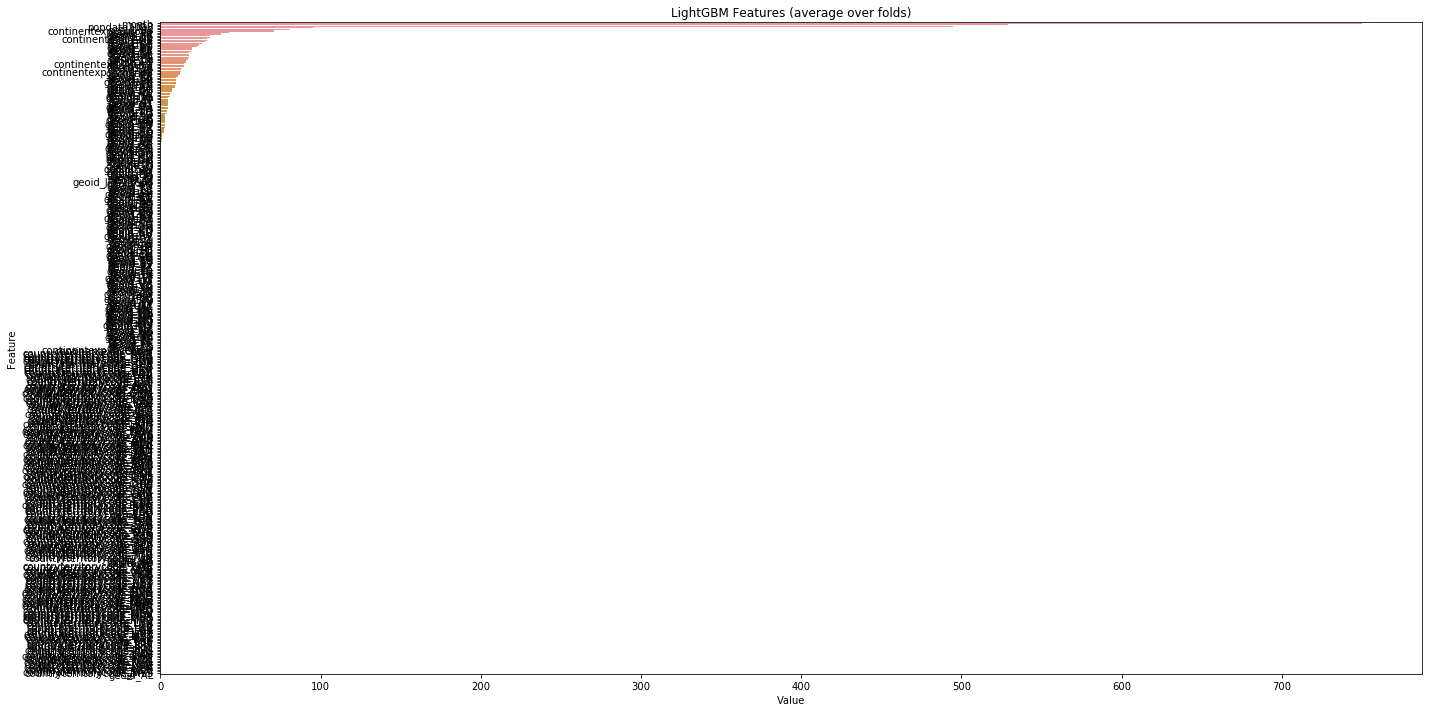

In [321]:
modelfit(lgbh, ecdc, req_list)

In [292]:
cvresult

NameError: name 'cvresult' is not defined

In [323]:
param_test1 = {
 'max_depth':[4,6,8],
 'min_child_weight':[1,3,5]
}


In [325]:
gsearch1 = GridSearchCV(estimator = lgb.LGBMRegressor(earning_rate =0.1, n_estimators=100, max_depth=5,
                                                  min_child_weight=1, subsample=0.8, colsample_bytree=0.8,
                                                  objective='regression', seed=0), 
                        param_grid = param_test1, scoring='r2',n_jobs=4,iid=False, cv=5)


In [326]:
gsearch1.fit(ecdc[req_list],ecdc[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Users\GadikatlaV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning:

The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20



([mean: 0.15947, std: 0.20918, params: {'max_depth': 4, 'min_child_weight': 1},
  mean: 0.15947, std: 0.20918, params: {'max_depth': 4, 'min_child_weight': 3},
  mean: 0.15947, std: 0.20918, params: {'max_depth': 4, 'min_child_weight': 5},
  mean: 0.14279, std: 0.23597, params: {'max_depth': 6, 'min_child_weight': 1},
  mean: 0.14279, std: 0.23597, params: {'max_depth': 6, 'min_child_weight': 3},
  mean: 0.14279, std: 0.23597, params: {'max_depth': 6, 'min_child_weight': 5},
  mean: 0.09917, std: 0.28878, params: {'max_depth': 8, 'min_child_weight': 1},
  mean: 0.09917, std: 0.28878, params: {'max_depth': 8, 'min_child_weight': 3},
  mean: 0.09917, std: 0.28878, params: {'max_depth': 8, 'min_child_weight': 5}],
 {'max_depth': 4, 'min_child_weight': 1},
 0.15946522610564914)

C:\Users\GadikatlaV\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

C:\Users\GadikatlaV\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:842: UserWarning:

silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.

C:\Users\GadikatlaV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning:

The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.



     rmse-mean    rmse-stdv
0   801.434623  1123.193820
1   774.090065  1115.679474
2   749.712483  1109.332629
3   727.882125  1104.022631
4   708.840865  1099.319513
5   691.463494  1095.529124
6   676.435337  1092.368644
7   664.700810  1091.202337
8   652.029868  1088.210030
9   643.560751  1086.473370
10  633.623015  1084.952205
11  624.857416  1083.595067
12  616.485483  1081.603376
13  609.020017  1079.867117
14  602.476710  1078.291369
15  596.713149  1076.760147
16  591.893749  1075.994962
17  587.189660  1074.779894
18  583.105114  1074.083537
19  580.861334  1072.777325
20  577.450945  1071.668121
21  574.549647  1070.604695
22  573.098467  1069.397052
23  570.907553  1068.773314
24  568.811951  1068.178973
25  566.977787  1067.609480
26  566.489116  1067.793995
27  564.832603  1067.223939
28  563.252135  1066.440856
29  562.051070  1065.835118
..         ...          ...
36  555.813454  1062.590744
37  555.558375  1062.134950
38  554.895125  1061.709405
39  553.964330  1060

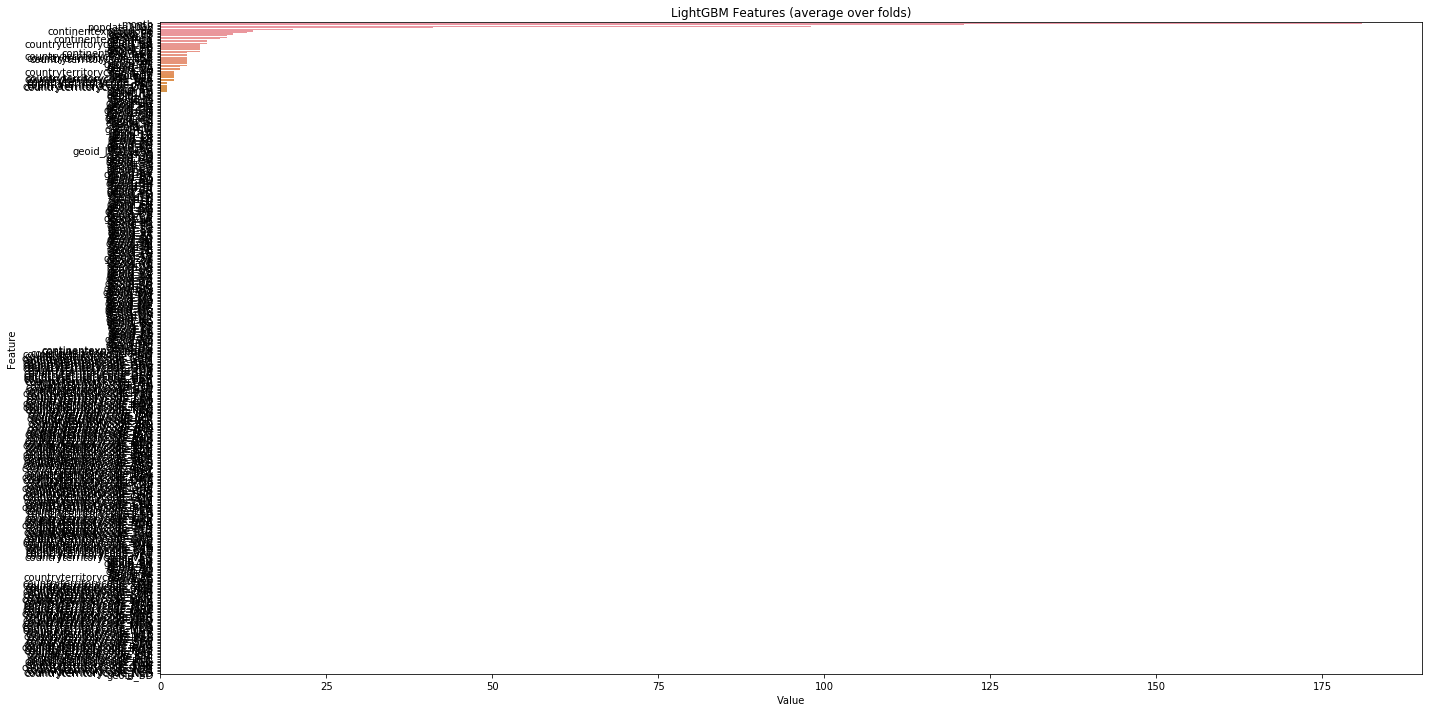

In [328]:
modelfit(gsearch1.best_estimator_, ecdc, req_list)

In [329]:
import pickle
file_name = "lgb_reg.pkl"

In [330]:

# save
pickle.dump(gsearch1.best_estimator_, open(file_name, "wb"))

In [331]:

# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

In [332]:
xgb_model_loaded.predict(ecdc_x)

array([ 158.58521131,  158.58521131,  158.58521131, ...,    9.33990409,
          9.33990409,    9.33990409])

In [209]:
lgbh = lgb.LGBMRegressor(seed=0, params=lgb_opt_params )

In [217]:
# Optimizo parametro n_estimators
cvlgm = lgb.cv(lgb_opt_params,lgb.Dataset(ecdc,label=ecdc_y),stratified=True,
               verbose_eval=False,early_stopping_rounds=70,num_boost_round=1000,seed=0,)

C:\Users\GadikatlaV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning:

The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.



In [214]:
lgbParams = lgb_opt_params.copy()

In [219]:
lgbParams['n_estimators']=len(cvlgm['rmse-mean'])

In [222]:
lgbh.set_params(**lgbParams)

LGBMRegressor(bagging_fraction=0.8, bagging_seed=2018, boosting_type='gbdt',
       class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
       importance_type='split', learning_rate=0.01, max_depth=-1,
       metric='rmse', min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=999, n_jobs=-1, num_leaves=40,
       objective='regression',
       params={'learning_rate': 0.01, 'boosting_type': 'gbdt', 'objective': 'regression', 'metric': 'rmse', 'num_leaves': 40, 'bagging_fraction': 0.8, 'feature_fraction': 0.6, 'reg_alpha': 2, 'reg_lambda': 0.1, 'bagging_seed': 2018, 'verbosity': -1},
       random_state=None, reg_alpha=2, reg_lambda=0.1, seed=0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
       verbosity=-1)

In [223]:
print("LGB rmse:",round(cvlgm['rmse-mean'][-1],5)," rmse-stdv:",round(cvlgm['rmse-stdv'][-1],6), " best It:",len(cvlgm['rmse-mean']))

LGB rmse: 565.82381  rmse-stdv: 1051.280772  best It: 999


In [224]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [225]:
cvlgm = lgbh.get_

AttributeError: 'LGBMRegressor' object has no attribute 'get_cv_score'

In [ ]:


lgbParams = lgb_opt_params.copy()

categs = lgbParams.pop('categorical_column', None)
lgbh.clf.set_params(**lgbParams)
print("LGB auc:",round(cvlgm['auc-mean'][-1],5)," auc-stdv:",round(cvlgm['auc-stdv'][-1],6), " best It:",len(cvlgm['auc-mean']))

kf = KFold(n_splits=5, shuffle=True, random_state=SEED)
cvlgm = lgbh.get_cv_score(ecdc, ecdc_y, kf)
print(cvlgm.mean())
cvPred = lgbh.cross_val_predict(train, Ytrain, kf,method='predict_proba')
cvPred= cvPred[:,1]
average_precision = metrics.average_precision_score(Ytrain, cvPred)
precision, recall, thresholds = metrics.precision_recall_curve(Ytrain, cvPred)
#for i in np.arange(0.20, 0.40, 0.01):
#    print(i,' - ',metrics.f1_score(Ytrain, np.where(cvPred>i,1,0)))
    #max 0.29
    
# Entreno modelo
lgbh.clf.fit(train, Ytrain)
# Realizo predicciones
pModelLGB = lgbh.clf.predict_proba(test)[:,1]

lgbh.clf.fit(train, Ytrain)
# Realizo predicciones
pModelLGB = lgbh.clf.predict_proba(test)[:,1]

thresholdTrain=0.29
posTest=int(len(pModelLGB)*cvPred[cvPred>thresholdTrain].shape[0]/cvPred.shape[0])
thresholdTest = pd.Series(pModelLGB).sort_values(ascending=False).iloc[posTest]
